# Bundesliga

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


### Daten einlesen

In [2]:
df = pd.read_csv('../../weitere_Daten/Bundesliga.csv')
df.head()

,Unnamed: 0,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore.Heim,Tore.Gast,Tore.Heim.Halbzeit,Tore.Gast.Halbzeit
0,1,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0
1,2,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0
2,3,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0
3,4,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0
4,5,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns = df.columns.str.replace('.', '_')
df.head()

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit
0,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0
1,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0
2,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0
3,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0
4,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0


In [6]:
df['Datum'] = pd.to_datetime(df.Datum)

In [7]:
df.shape

(13406, 10)

In [10]:
df.ndim

2

In [11]:
df.describe()

,Spieltag,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit
count,13406.000000,13406.000000,13406.000000,13402.000000,13402.000000
mean,17.485081,1.907877,1.191183,0.833085,0.514774
std,9.819879,1.472291,1.157593,0.917930,0.714929
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,1.000000,1.000000,0.000000
75%,26.000000,3.000000,2.000000,1.000000,1.000000
max,38.000000,12.000000,9.000000,6.000000,6.000000


In [15]:
# Heim- versus Gast-Toreverteilung
tab_heim = df.Tore_Heim.value_counts()
tab_gast = df.Tore_Gast.value_counts()
pd.concat([tab_heim, tab_gast], axis=1)

,Tore_Heim,Tore_Gast
0,2244,4287.0
1,3743,4745.0
2,3385,2704.0
3,2201,1113.0
4,1109,397.0
5,458,98.0
6,178,43.0
7,62,14.0
8,12,2.0
9,8,3.0


### Neue Variablen definieren:

In [17]:
df['Tore'] = df.Tore_Heim + df.Tore_Gast
df.head()

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit,Tore
0,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0,2
1,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0,5
2,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0,2
3,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0,5
4,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0,2


In [18]:
df['Tore_Erste_Halbzeit'] = df.Tore_Heim_Halbzeit + df.Tore_Gast_Halbzeit
df['Tore_Zweite_Halbzeit'] = df.Tore - df.Tore_Erste_Halbzeit

In [21]:
SpieleSaison = df.groupby('Saison').size()
SpieleSaison.median()

306.0

Meistens werden 306 Spiele pro Saison ausgetragen. Wie viele Manschaften impliziert dies? (Jede Manschaft spielt gegen alle anderen einmal zu Hause und einmal auswärts!)

$$ n \cdot (n-1) = 306 $$

$n=18$ Mannschaften spielen in der Regel in der Bundesliga.

### Einige Auswertungen

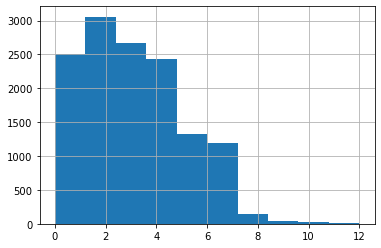

In [27]:
df.Tore.hist();

In [28]:
df.Tore

0        2
1        5
2        2
3        5
4        2
        ..
13401    7
13402    3
13403    2
13404    4
13405    3
Name: Tore, Length: 13406, dtype: int64

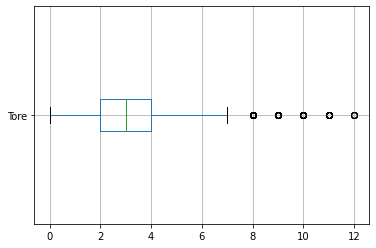

In [32]:
df.boxplot(column='Tore', vert=False);

Welches waren die torreichsten Spiele?

In [33]:
df[df.Tore == df.Tore.max()]

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit,Tore,Tore_Erste_Halbzeit,Tore_Zweite_Halbzeit
86,1963/1964,11,1963-11-16,17:30,Borussia Dortmund,1. FC Kaiserslautern,9,3,5.0,1.0,12,6.0,6.0
2458,1971/1972,16,1971-11-27,15:30,FC Bayern Muenchen,Borussia Dortmund,11,1,4.0,0.0,12,4.0,8.0
4048,1976/1977,23,1977-02-26,15:30,1. FC Koeln,Tennis Borussia Berlin,8,4,4.0,2.0,12,6.0,6.0
4454,1977/1978,34,1978-04-29,15:30,Borussia Moenchengladbach,Borussia Dortmund,12,0,6.0,0.0,12,6.0,6.0
5785,1982/1983,12,1982-11-06,15:30,Borussia Dortmund,Arminia Bielefeld,11,1,1.0,1.0,12,2.0,10.0


Wie ist hat sich die durchschnittlich Anzahl Tore pro Spiel über die Saisons verändert?

In [37]:
ToreSaison = df.groupby('Saison').Tore.mean()
ToreSaison.head()

Saison
1963/1964    3.570833
1964/1965    3.316667
1965/1966    3.225490
1966/1967    2.924837
1967/1968    3.245098
Name: Tore, dtype: float64

In [ ]:
df['Nach1985'] = df.groupby()

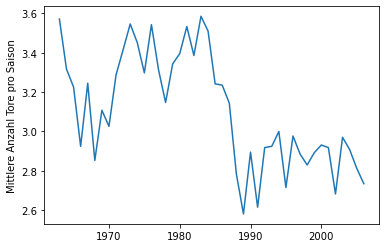

In [39]:
ToreSaison.index = range(1963, 2007) # x-Achse numerisch beschriften
ToreSaison.plot()
plt.ylabel('Mittlere Anzahl Tore pro Saison');

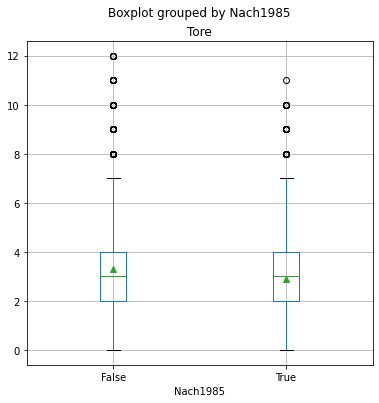

In [41]:
# Toreverteilung vor und nach 1985:
df['Nach1985'] = df.Datum.dt.year > 1985
df.boxplot(column='Tore', by='Nach1985', figsize=(6, 6),
          showmeans=True);

In [42]:
df.groupby('Nach1985').Tore.describe()

,count,mean,std,min,25%,50%,75%,max
Nach1985,,,,,,,,
False,6753.0,3.318229,1.928180,0.0,2.0,3.0,4.0,12.0
True,6653.0,2.876597,1.731603,0.0,2.0,3.0,4.0,11.0


### Gemeinsame Häufigkeiten bezüglich Tore in der ersten und zweiten Halbzeit

In [51]:
pd.crosstab(index=df.Tore_Erste_Halbzeit > 0, columns=df.Tore_Zweite_Halbzeit > 0, 
            normalize=True, margins=True).round(2)

Tore_Zweite_Halbzeit,False,True,All
Tore_Erste_Halbzeit,,,
False,0.07,0.20,0.26
True,0.12,0.62,0.74
All,0.18,0.82,1.00


### Nun die bedingte Verteilung (Bedingung auf erste Halbzeit)

In [52]:
pd.crosstab(index=df.Tore_Erste_Halbzeit > 0, columns=df.Tore_Zweite_Halbzeit > 0, 
            normalize='index', margins=True).round(2)

Tore_Zweite_Halbzeit,False,True
Tore_Erste_Halbzeit,,
False,0.25,0.75
True,0.16,0.84
All,0.18,0.82


### Wie viele Spiele wurden vom Heimteam (1), Gastteam (2) oder keinem (X) gewonnen?

In [53]:
df['Gewonnen'] = np.select([df.Tore_Heim > df.Tore_Gast, 
                            df.Tore_Heim < df.Tore_Gast],
                          [1, 2], default=0)
df.head()
# Alternativ mit verschachteltem np.where()

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit,Tore,Tore_Erste_Halbzeit,Tore_Zweite_Halbzeit,Nach1985,Gewonnen
0,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0,2,1.0,1.0,False,0
1,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0,5,2.0,3.0,False,1
2,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0,2,2.0,0.0,False,0
3,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0,5,3.0,2.0,False,2
4,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0,2,1.0,1.0,False,0


In [55]:
df.Gewonnen.value_counts(normalize=True).round(2)

1    0.52
0    0.26
2    0.22
Name: Gewonnen, dtype: float64

In [57]:
df.Gewonnen.value_counts(normalize=True, sort=False).round(2)

0    0.26
1    0.52
2    0.22
Name: Gewonnen, dtype: float64

Welche und wie viele Mannschaften haben in den untersuchten Saisons gespielt?

In [59]:
Teams = df.Heim.append(df.Gast)
Teams.head()

0      Hertha BSC Berlin
1       SV Werder Bremen
2    Eintracht Frankfurt
3          Karlsruher SC
4      TSV 1860 Muenchen
dtype: object

In [60]:
Teams.nunique()

50

Welche drei Mannschaften haben die meisten Spiele in den untersuchten Saisons?

In [61]:
Teams.value_counts().head(3)

Hamburger SV          1492
SV Werder Bremen      1458
FC Bayern Muenchen    1432
dtype: int64